# Exploração de dados de candidatos do TSE

In [1]:
import json
import pandas
import glob
import numpy as np
import matplotlib

In [2]:
with open(glob.glob('../data/raw/S3_2018_pr*.json')[0], 'r') as f:
    this = json.load(f)
candidatos = pandas.DataFrame(this).groupby('id', as_index=False).last()
with open(glob.glob('../data/raw/S3_2018_ex*.json')[0], 'r') as f:
    this = json.load(f)
financeiro = pandas.DataFrame(this).groupby('idCandidato', as_index=False).last()

In [3]:
sum(financeiro['idCandidato'].apply(lambda x: int(x) not in candidatos['id'].values))

0

In [4]:
candidatos['eleicoesAnteriores_n'] = candidatos['eleicoesAnteriores'].apply(
    lambda x: sum([z['nrAno']!=2018 for z in x])
)

In [5]:
candidatos['coligacao'] = candidatos.apply(
    lambda row: row['composicaoColigacao'] if row['composicaoColigacao']!='**' else row['partido']['sigla'],
    axis=1,
)

In [6]:
candidatos['cargo'] = candidatos['cargo'].apply(
    lambda value: value.get('codigo')
)

In [7]:
sp = candidatos[candidatos['localCandidatura']=='SÃO PAULO']

In [8]:
this = candidatos[(candidatos['localCandidatura']=='SÃO PAULO')&
                 (candidatos['cargo']==6)]
this[['coligacao','eleicoesAnteriores_n']].groupby('coligacao').size()

coligacao
AVANTE                   100
DC                        59
MDB                       64
NOVO                      47
PATRI                    100
PCO                       10
PDT                       32
PMB / PHS / PODE         107
PMN / REDE                90
PPL                       60
PR                        45
PRB                      102
PROS                     100
PRP                       79
PRTB                      62
PSB / PSC / PPS / PTB     95
PSDB / PSD / DEM / PP    104
PSL                       67
PSOL / PCB                86
PSTU                       7
PT / PC do B              83
PTC                       41
PV                        86
SOLIDARIEDADE             48
dtype: int64

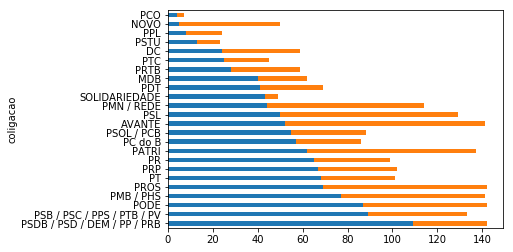

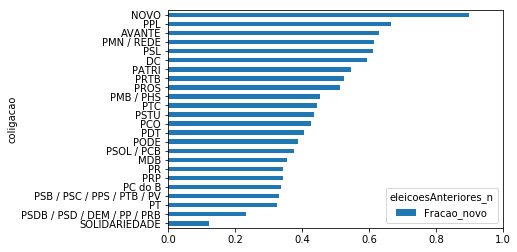

In [33]:
this = candidatos[(candidatos['localCandidatura']=='SÃO PAULO')&
                 (candidatos['cargo']==7)]
df = pandas.crosstab(
    [
        this.coligacao
    ],
    this.eleicoesAnteriores_n>0
).rename(columns={False: 'Novo', True: 'Velho'})
df['Fracao_novo'] = df['Novo'] / (df['Novo']+df['Velho'])
df = df.sort_values(by='Velho',ascending=False)
df[['Velho','Novo']].plot.barh(stacked=True, legend=False);
df[['Fracao_novo']].sort_values(by='Fracao_novo').plot.barh(xlim=(0,1))

### Como é estruturada a resposta?

In [34]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28505 entries, 0 to 28504
Data columns (total 65 columns):
id                                  28505 non-null int64
arquivos                            28505 non-null object
bens                                28505 non-null object
cargo                               28505 non-null int64
cnpjcampanha                        28301 non-null object
codigoSituacaoCandidato             28505 non-null int64
composicaoColigacao                 28505 non-null object
cpf                                 28505 non-null object
dataDeNascimento                    28505 non-null object
dataUltimaAtualizacao               28505 non-null object
descricaoCorRaca                    28505 non-null object
descricaoEstadoCivil                28505 non-null object
descricaoNaturalidade               28505 non-null object
descricaoSexo                       28505 non-null object
descricaoSituacao                   28505 non-null object
descricaoSituacaoCandida

In [35]:
financeiro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28505 entries, 0 to 28504
Data columns (total 36 columns):
idCandidato                    28505 non-null object
ano                            28505 non-null int64
cnpj                           28291 non-null object
concentracaoDespesas           4122 non-null object
contasBancarias                28412 non-null object
dadosConsolidados              4122 non-null object
dataUltimaAtualizacaoContas    28505 non-null object
despesas                       4122 non-null object
dividaCampanha                 0 non-null object
entregaAtual                   0 non-null object
haveExtratos                   28412 non-null object
haveNfes                       28412 non-null object
historicoEntregas              28505 non-null object
idEleicao                      28505 non-null int64
idOrgao                        0 non-null object
idPrestador                    28412 non-null object
idUltimaEntrega                4122 non-null object
nmUe    

### Obtendo códigos de eleições anteriores

In [ ]:
anteriores = []
for cand in candidatos:
    anteriores += cand['eleicoesAnteriores']
print(anteriores[0].keys())
anteriores_idEleicao = np.unique([(str(x['nrAno'])+'_'+str(x['idEleicao'])) for x in anteriores], return_counts=True)
anteriores_idEleicao = {x:y for x,y in zip(*anteriores_idEleicao)}

É possível usar o mesmo endpoint para acessar informações (inclusive declaração de bens) de eleições anteriores.

In [ ]:
set([x['composicaoColigacao'] for x in pnovo])

In [ ]:
candidatos[0]['eleicoesAnteriores']

In [ ]:
import requests
test = requests.get('http://divulgacandcontas.tse.jus.br/divulga/rest/v1/candidatura/buscar/2012/61638/1699/candidato/250000073921').json()

In [ ]:
test['totalDeBens']

In [ ]:
candidatos[0]['bens']

In [ ]:
test['bens']